In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the test data into dataframes
df_survey_test_data = pd.read_csv('/content/drive/MyDrive/MITAppliedDatascience/Hackathon2024MITAppliedDatascienceLeveragingAI/Surveydata_test.csv')
df_travel_test_data = pd.read_csv('/content/drive/MyDrive/MITAppliedDatascience/Hackathon2024MITAppliedDatascienceLeveragingAI/Traveldata_test.csv')

In [ ]:
# Read Survey data files
df_survey_data = pd.read_csv('/content/drive/MyDrive/MITAppliedDatascience/Hackathon2024MITAppliedDatascienceLeveragingAI/Surveydata_train.csv')
# Returns the first 5 rows
df_survey_data.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
# Read Travel data files
df_travel_data = pd.read_csv('/content/drive/MyDrive/MITAppliedDatascience/Hackathon2024MITAppliedDatascienceLeveragingAI/Traveldata_train.csv')
# Returns the first 5 rows
df_travel_data.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
# Returns the last 5 rows of the survey data
df_survey_data.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [ ]:
# Returns the last 5 rows of the travel data
df_travel_data.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [ ]:
#Getting the info on the survey data
df_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [ ]:
#Getting the info on the travel data
df_travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
#Describe the survey data
df_survey_data.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0
Seat_Comfort,94318,6,Acceptable,21158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat_Class,94379,2,Green Car,47435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time_Convenient,85449,6,Good,19574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Catering,85638,6,Acceptable,18468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform_Location,94349,6,Manageable,24173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_Wifi_Service,94349,6,Good,22835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_Entertainment,94361,6,Good,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online_Support,94288,6,Good,30016,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Describe the travel data
df_travel_data.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


In [ ]:
#Checking for null values on all columns in the survey data
df_survey_data[df_survey_data.isnull().all(axis=1)]

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding


In [ ]:
#Checking for null values on all columns in the travel data
df_travel_data[df_travel_data.isnull().all(axis=1)]

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins


In [ ]:
#Shape of the survey data
df_survey_data.shape

(94379, 17)

In [ ]:
#Shape of the travel data
df_travel_data.shape

(94379, 9)

In [ ]:
#Check for special chars in the numerical columns
special = '[@_!#$%^&*()<>?/\|}{~:]'


print(df_survey_data[df_survey_data.ID.astype(str).str.contains(r'[@#&$%+-/*]')])

print(df_survey_data[df_survey_data.Overall_Experience.astype(str).str.contains(r'[@#&$%+-/*]')])

print(df_travel_data[df_travel_data.ID.astype(str).str.contains(r'[@#&$%+-/*]')])

print(df_travel_data[df_travel_data.Travel_Distance.astype(str).str.contains(r'[@#&$%+-/*]')])

Empty DataFrame
Columns: [ID, Overall_Experience, Seat_Comfort, Seat_Class, Arrival_Time_Convenient, Catering, Platform_Location, Onboard_Wifi_Service, Onboard_Entertainment, Online_Support, Ease_of_Online_Booking, Onboard_Service, Legroom, Baggage_Handling, CheckIn_Service, Cleanliness, Online_Boarding]
Index: []
Empty DataFrame
Columns: [ID, Overall_Experience, Seat_Comfort, Seat_Class, Arrival_Time_Convenient, Catering, Platform_Location, Onboard_Wifi_Service, Onboard_Entertainment, Online_Support, Ease_of_Online_Booking, Onboard_Service, Legroom, Baggage_Handling, CheckIn_Service, Cleanliness, Online_Boarding]
Index: []
Empty DataFrame
Columns: [ID, Gender, Customer_Type, Age, Type_Travel, Travel_Class, Travel_Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins]
Index: []
Empty DataFrame
Columns: [ID, Gender, Customer_Type, Age, Type_Travel, Travel_Class, Travel_Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins]
Index: []


In [ ]:
#Checking the data in the age column if it is null or NaN
#print(df_travel_data[df_travel_data.Age.astype(str).str.contains(r'[@#&$%+-/*]')])

NaN_mask = df_travel_data.Age.isna()
NaN_rows = df_travel_data[NaN_mask]
print (NaN_rows.count())

null_mask = df_travel_data.Age.isnull()
null_rows = df_travel_data[null_mask]
print (null_rows.count())

ID                         33
Gender                     33
Customer_Type              30
Age                         0
Type_Travel                 0
Travel_Class               33
Travel_Distance            33
Departure_Delay_in_Mins    33
Arrival_Delay_in_Mins      33
dtype: int64
ID                         33
Gender                     33
Customer_Type              30
Age                         0
Type_Travel                 0
Travel_Class               33
Travel_Distance            33
Departure_Delay_in_Mins    33
Arrival_Delay_in_Mins      33
dtype: int64


In [ ]:
#Check for NaN & null data in Departure_Delay_in_Mins column
#print(df_travel_data[df_travel_data.Departure_Delay_in_Mins.astype(str).str.contains(r'[@#&$%+-/*]')])
NaN_mask = df_travel_data.Departure_Delay_in_Mins.isna()
NaN_rows = df_travel_data[NaN_mask]
print (NaN_rows.count())

null_mask = df_travel_data.Departure_Delay_in_Mins.isnull()
null_rows = df_travel_data[null_mask]
print (null_rows.count())


ID                         57
Gender                     27
Customer_Type              25
Age                        57
Type_Travel                51
Travel_Class               57
Travel_Distance            57
Departure_Delay_in_Mins     0
Arrival_Delay_in_Mins       0
dtype: int64
ID                         57
Gender                     27
Customer_Type              25
Age                        57
Type_Travel                51
Travel_Class               57
Travel_Distance            57
Departure_Delay_in_Mins     0
Arrival_Delay_in_Mins       0
dtype: int64


In [ ]:
#Check for null or NaN values in the column Arrival_Delay_in_Mins
#print(df_travel_data[df_travel_data.Arrival_Delay_in_Mins.astype(str).str.contains(r'[@#&$%+-/*]')])

NaN_mask = df_travel_data.Arrival_Delay_in_Mins.isna()
NaN_rows = df_travel_data[NaN_mask]
print (NaN_rows.count())

null_mask = df_travel_data.Arrival_Delay_in_Mins.isnull()
null_rows = df_travel_data[null_mask]
print (null_rows.count())


ID                         357
Gender                     327
Customer_Type              297
Age                        357
Type_Travel                325
Travel_Class               357
Travel_Distance            357
Departure_Delay_in_Mins    300
Arrival_Delay_in_Mins        0
dtype: int64
ID                         357
Gender                     327
Customer_Type              297
Age                        357
Type_Travel                325
Travel_Class               357
Travel_Distance            357
Departure_Delay_in_Mins    300
Arrival_Delay_in_Mins        0
dtype: int64


In [ ]:
#Check for NaN data in Departure_Delay_in_Mins column
#print(df_travel_data[df_travel_data.Arrival_Delay_in_Mins.astype(str).str.contains(r'[@#&$%+-/*]')])
NaN_mask = df_travel_data.Departure_Delay_in_Mins.isna()
NaN_rows = df_travel_data[NaN_mask]
print (NaN_rows.count())

null_mask = df_travel_data.Departure_Delay_in_Mins.isnull()
null_rows = df_travel_data[null_mask]
print (null_rows.count())

ID                         57
Gender                     27
Customer_Type              25
Age                        57
Type_Travel                51
Travel_Class               57
Travel_Distance            57
Departure_Delay_in_Mins     0
Arrival_Delay_in_Mins       0
dtype: int64
ID                         57
Gender                     27
Customer_Type              25
Age                        57
Type_Travel                51
Travel_Class               57
Travel_Distance            57
Departure_Delay_in_Mins     0
Arrival_Delay_in_Mins       0
dtype: int64


In [ ]:
# Merge the survey data and the travel data. Drop duplicates from song_df and na values from the data simultaneously
df_merge = df_survey_data.merge(df_travel_data, on='ID', how='inner').drop_duplicates()
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

In [ ]:
df_merge.shape

(94379, 25)

In [ ]:
df_merge.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
#Confirming no NaN or null data is included in the merged dataset
NaN_mask = df_merge.isna()
NaN_rows = df_merge[NaN_mask]
print (NaN_rows.count())

null_mask = df_merge.isnull()
null_rows = df_merge[null_mask]
print (null_rows.count())

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64
ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
O

In [ ]:
#Merge test data
df_merge_test = df_survey_test_data.merge(df_travel_test_data, on='ID', how='left')
df_merge_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_Time_Convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_Location        35590 non-null  object 
 6   Onboard_Wifi_Service     35590 non-null  object 
 7   Onboard_Entertainment    35594 non-null  object 
 8   Online_Support           35576 non-null  object 
 9   Ease_of_Online_Booking   35584 non-null  object 
 10  Onboard_Service          32730 non-null  object 
 11  Legroom                  35577 non-null  object 
 12  Baggage_Handling         35562 non-null  object 
 13  CheckIn_Service          35580 non-null  object 
 14  Cleanliness           

In [ ]:
#Impute with the most frequent value for NA values
df_merge = df_merge.fillna(df_merge.mode().iloc[0])
df_merge_test = df_merge_test.fillna(df_merge_test.mode().iloc[0])
print(df_merge.isna().any())
print(df_merge_test.isna().any())

print(df_merge.isnull().any())
print(df_merge_test.isnull().any())

ID                         False
Overall_Experience         False
Seat_Comfort               False
Seat_Class                 False
Arrival_Time_Convenient    False
Catering                   False
Platform_Location          False
Onboard_Wifi_Service       False
Onboard_Entertainment      False
Online_Support             False
Ease_of_Online_Booking     False
Onboard_Service            False
Legroom                    False
Baggage_Handling           False
CheckIn_Service            False
Cleanliness                False
Online_Boarding            False
Gender                     False
Customer_Type              False
Age                        False
Type_Travel                False
Travel_Class               False
Travel_Distance            False
Departure_Delay_in_Mins    False
Arrival_Delay_in_Mins      False
dtype: bool
ID                         False
Seat_Comfort               False
Seat_Class                 False
Arrival_Time_Convenient    False
Catering                   Fals

<Axes: xlabel='Overall_Experience', ylabel='count'>

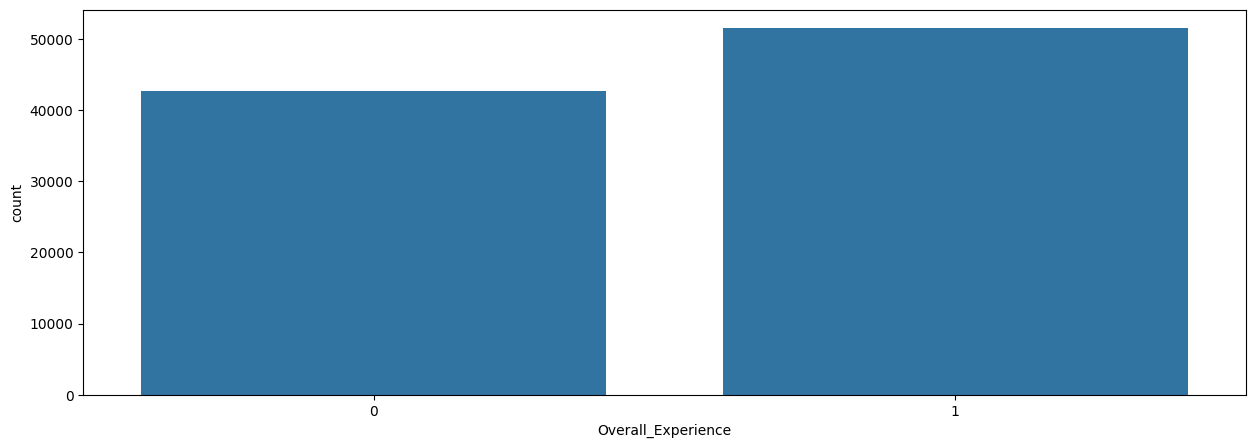

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_merge, x = 'Overall_Experience') # Create a countplot for Overall_Experience type

In [ ]:
# Apply label encoding to encode the category to numeric features for train data
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows
# how to understand word labels.
label_encoder = LabelEncoder()

# Encode labels in column which use the same rating values
df_merge['Legroom']= label_encoder.fit_transform(df_merge['Legroom'])
df_merge['Catering']= label_encoder.fit_transform(df_merge['Catering'])
df_merge['Onboard_Service']= label_encoder.fit_transform(df_merge['Onboard_Service'])
df_merge['Baggage_Handling']= label_encoder.fit_transform(df_merge['Baggage_Handling'])
df_merge['CheckIn_Service']= label_encoder.fit_transform(df_merge['CheckIn_Service'])
df_merge['Cleanliness']= label_encoder.fit_transform(df_merge['Cleanliness'])
df_merge['Onboard_Service']= label_encoder.fit_transform(df_merge['Onboard_Service'])
df_merge['Seat_Comfort']= label_encoder.fit_transform(df_merge['Seat_Comfort'])
df_merge['Type_Travel']= label_encoder.fit_transform(df_merge['Type_Travel'])
df_merge['Gender']= label_encoder.fit_transform(df_merge['Gender'])
df_merge['Customer_Type']= label_encoder.fit_transform(df_merge['Customer_Type'])
df_merge['Travel_Class']= label_encoder.fit_transform(df_merge['Travel_Class'])
df_merge['Onboard_Entertainment']= label_encoder.fit_transform(df_merge['Onboard_Entertainment'])
df_merge['Seat_Class']= label_encoder.fit_transform(df_merge['Seat_Class'])
df_merge['Arrival_Time_Convenient']= label_encoder.fit_transform(df_merge['Arrival_Time_Convenient'])
df_merge['Platform_Location']= label_encoder.fit_transform(df_merge['Platform_Location'])
df_merge['Onboard_Wifi_Service']= label_encoder.fit_transform(df_merge['Onboard_Wifi_Service'])
df_merge['Online_Support']= label_encoder.fit_transform(df_merge['Online_Support'])
df_merge['Ease_of_Online_Booking']= label_encoder.fit_transform(df_merge['Ease_of_Online_Booking'])
df_merge['Online_Boarding']= label_encoder.fit_transform(df_merge['Online_Boarding'])

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94379 non-null  int64  
 3   Seat_Class               94379 non-null  int64  
 4   Arrival_Time_Convenient  94379 non-null  int64  
 5   Catering                 94379 non-null  int64  
 6   Platform_Location        94379 non-null  int64  
 7   Onboard_Wifi_Service     94379 non-null  int64  
 8   Onboard_Entertainment    94379 non-null  int64  
 9   Online_Support           94379 non-null  int64  
 10  Ease_of_Online_Booking   94379 non-null  int64  
 11  Onboard_Service          94379 non-null  int64  
 12  Legroom                  94379 non-null  int64  
 13  Baggage_Handling         94379 non-null  int64  
 14  CheckIn_Service       

In [ ]:
# Apply label encoding to encode the category to numeric features for test data
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows
# how to understand word labels.
label_encoder = LabelEncoder()

# Encode labels in column which use the same rating values
df_merge_test['Legroom']= label_encoder.fit_transform(df_merge_test['Legroom'])
df_merge_test['Catering']= label_encoder.fit_transform(df_merge_test['Catering'])
df_merge_test['Onboard_Service']= label_encoder.fit_transform(df_merge_test['Onboard_Service'])
df_merge_test['Baggage_Handling']= label_encoder.fit_transform(df_merge_test['Baggage_Handling'])
df_merge_test['CheckIn_Service']= label_encoder.fit_transform(df_merge_test['CheckIn_Service'])
df_merge_test['Cleanliness']= label_encoder.fit_transform(df_merge_test['Cleanliness'])
df_merge_test['Onboard_Service']= label_encoder.fit_transform(df_merge_test['Onboard_Service'])
df_merge_test['Seat_Comfort']= label_encoder.fit_transform(df_merge_test['Seat_Comfort'])
df_merge_test['Type_Travel']= label_encoder.fit_transform(df_merge_test['Type_Travel'])
df_merge_test['Gender']= label_encoder.fit_transform(df_merge_test['Gender'])
df_merge_test['Customer_Type']= label_encoder.fit_transform(df_merge_test['Customer_Type'])
df_merge_test['Travel_Class']= label_encoder.fit_transform(df_merge_test['Travel_Class'])
df_merge_test['Onboard_Entertainment']= label_encoder.fit_transform(df_merge_test['Onboard_Entertainment'])
df_merge_test['Seat_Class']= label_encoder.fit_transform(df_merge_test['Seat_Class'])
df_merge_test['Arrival_Time_Convenient']= label_encoder.fit_transform(df_merge_test['Arrival_Time_Convenient'])
df_merge_test['Platform_Location']= label_encoder.fit_transform(df_merge_test['Platform_Location'])
df_merge_test['Onboard_Wifi_Service']= label_encoder.fit_transform(df_merge_test['Onboard_Wifi_Service'])
df_merge_test['Online_Support']= label_encoder.fit_transform(df_merge_test['Online_Support'])
df_merge_test['Ease_of_Online_Booking']= label_encoder.fit_transform(df_merge_test['Ease_of_Online_Booking'])
df_merge_test['Online_Boarding']= label_encoder.fit_transform(df_merge_test['Online_Boarding'])

df_merge_test['Overall_Experience'] = ''

df_merge_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35602 non-null  int64  
 2   Seat_Class               35602 non-null  int64  
 3   Arrival_Time_Convenient  35602 non-null  int64  
 4   Catering                 35602 non-null  int64  
 5   Platform_Location        35602 non-null  int64  
 6   Onboard_Wifi_Service     35602 non-null  int64  
 7   Onboard_Entertainment    35602 non-null  int64  
 8   Online_Support           35602 non-null  int64  
 9   Ease_of_Online_Booking   35602 non-null  int64  
 10  Onboard_Service          35602 non-null  int64  
 11  Legroom                  35602 non-null  int64  
 12  Baggage_Handling         35602 non-null  int64  
 13  CheckIn_Service          35602 non-null  int64  
 14  Cleanliness           

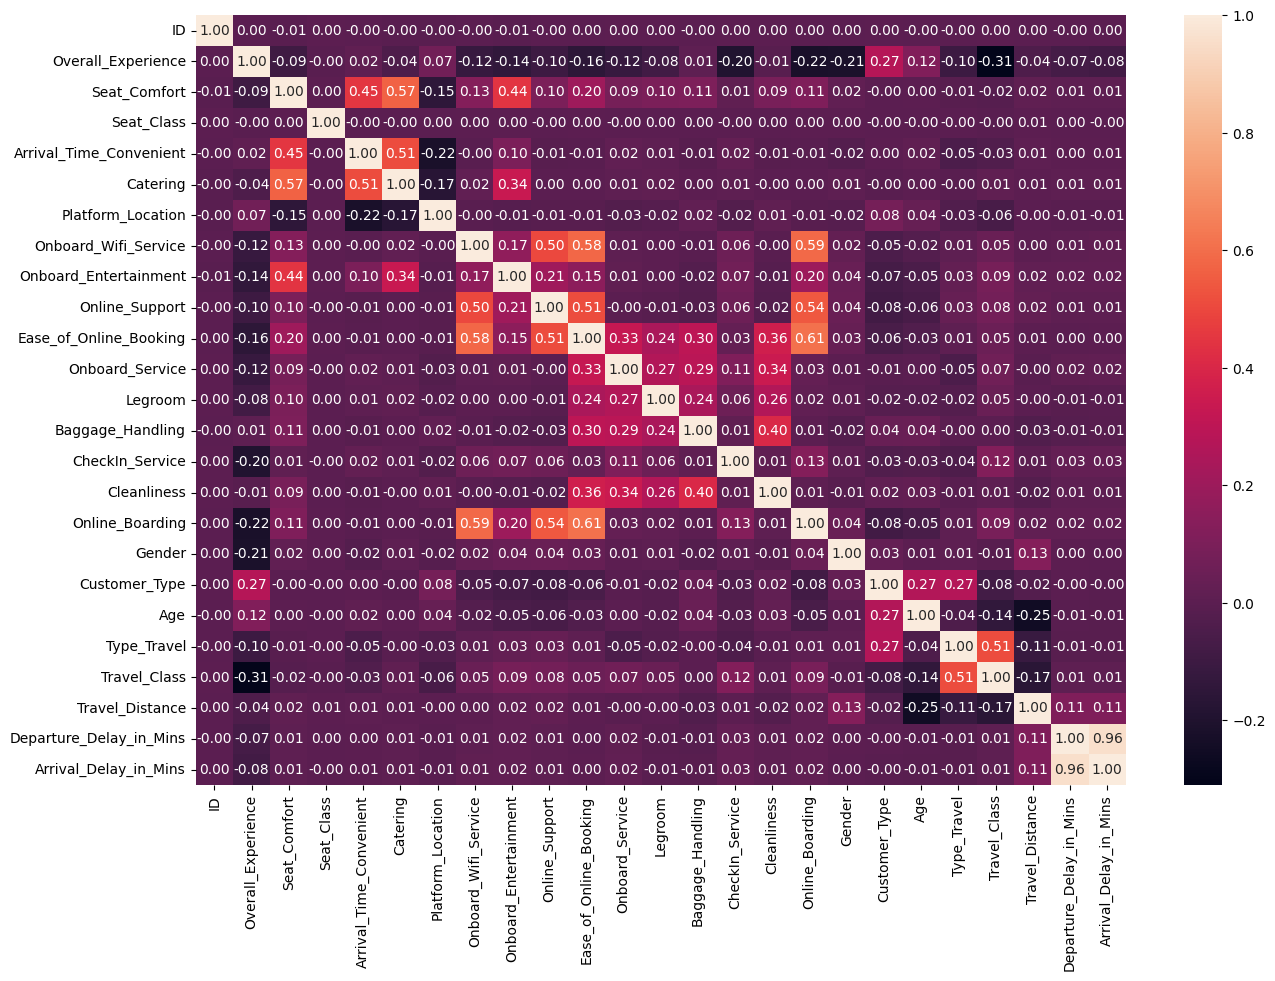

In [ ]:
# Calculate correlation on numerical columns only
plt.figure(figsize=(15, 10))
sns.heatmap(df_merge.select_dtypes(include=['number']).corr(), annot=True, fmt='0.2f')
plt.show()

We see a positive co-relation with the following variables:
1.  Overall_Experience and Customer_Type
2.  Seat_Comfort and Catering
3.  Seat_Comfort and Onboard_Entertainment
4.  Onboard_Entertainment and Catering
5.  Onboard_Service and Legroom
6.  Onboard_Service and Baggage_Handling
7.  Onboard_Service and Cleanliness
8.  Legroom and Baggage_Handling
9.  Legroom and Cleanliness
10.  Baggage_Handling and Cleanliness
11.  Customer_Type and Overall_Experience
12.  Customer_Type and Age
13.  Customer_Type and Travel_Type
14.  Travel_Type and Travel_Class (one or the other should be included).

We see a negative co-relation with the following variables:
1.  Overall_Experience and Travel_Class
2.  Age and Travel_Distance






In [ ]:
df_merge.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,4,0,1,1,4,3,4,0,...,4,5,0,1,52.0,0,0,272,0.0,5.0
1,98800002,0,5,1,1,5,3,3,5,3,...,3,3,1,1,48.0,1,1,2200,9.0,0.0
2,98800003,1,4,0,4,4,3,4,3,1,...,1,1,0,1,43.0,0,0,1061,77.0,119.0
3,98800004,0,0,1,4,0,3,0,4,0,...,0,0,0,1,44.0,0,0,780,13.0,18.0
4,98800005,1,0,1,0,0,2,4,3,1,...,3,3,0,1,50.0,0,0,1981,0.0,0.0


In [ ]:
#Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Define our features and target (this is helpful in case you would like to drop any features that harm model performance)
features = ['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
            'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
       'Onboard_Service', 'Legroom','Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding','Gender', 'Customer_Type', 'Age',
       'Type_Travel',  'Travel_Class', 'Travel_Distance', 'Departure_Delay_in_Mins']

target = ['Overall_Experience']


# Split into test and train
X_train = df_merge[features]
y_train = df_merge[target].to_numpy()
X_test = df_merge_test[features]
y_test = df_merge_test[target].to_numpy()

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


<Axes: >

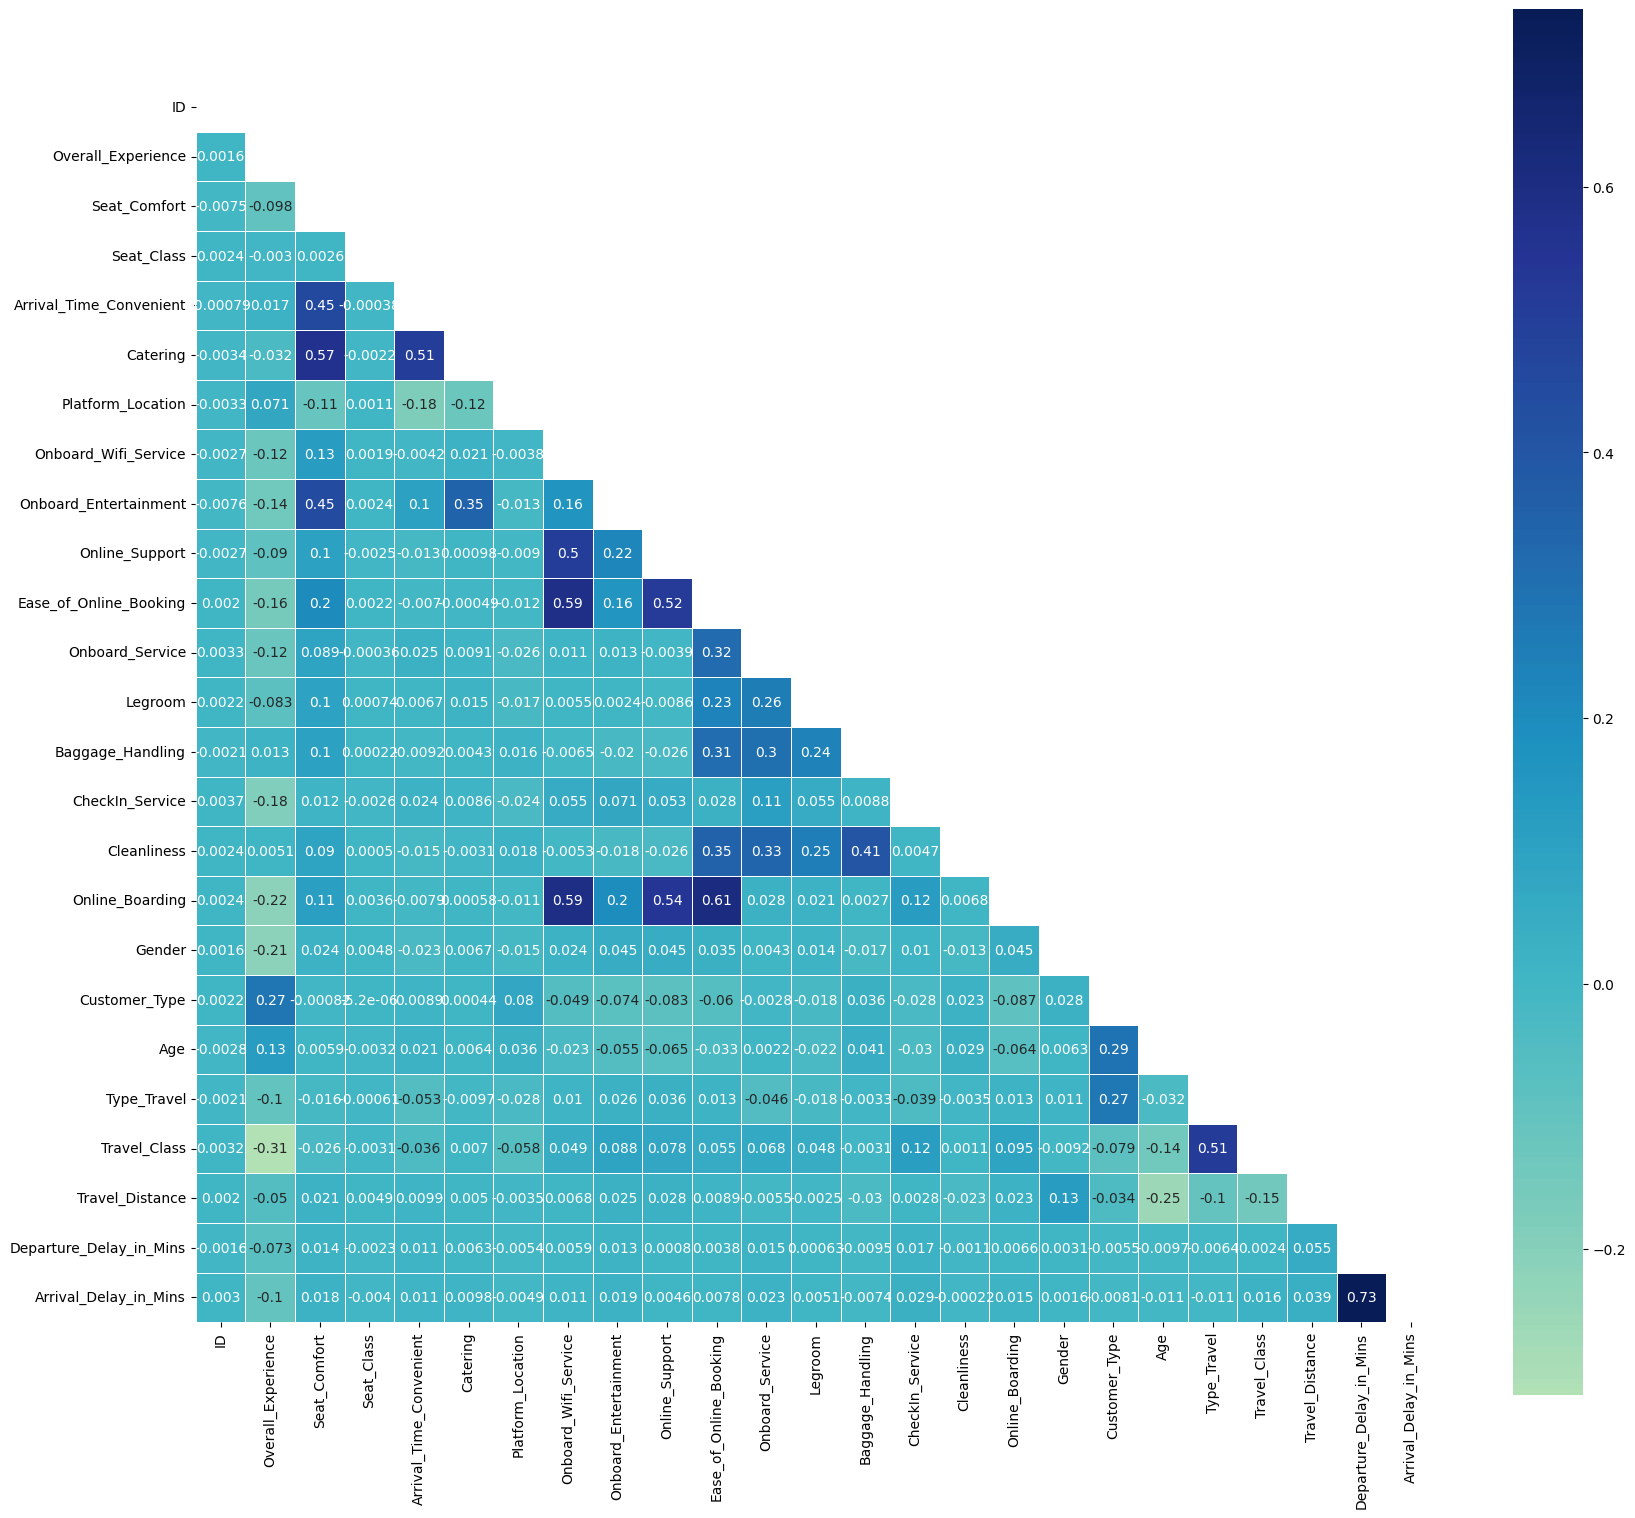

In [ ]:
corr = df_merge.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

#Using RandomForestClassifier
params_rf = {'max_depth': [25],
         'min_samples_leaf': [1],
         'min_samples_split': [2],
         'n_estimators': [1200],
         'random_state': [42]}

model_rf = RandomForestClassifier(**params_rf)
clf = GridSearchCV(model_rf, params_rf, cv = 10, scoring='accuracy', n_jobs = -1)

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)


{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200, 'random_state': 42}
0.9496392029111401


In [ ]:
warnings.filterwarnings('ignore')
# Using LGBMClassifier
import lightgbm as lgb

params_lgb ={'colsample_bytree': [0.85], # Wrap single values in a list
         'max_depth': [15],
         'min_split_gain': [0.1],
         'n_estimators': [200],
         'num_leaves': [50],
         'reg_alpha': [1.2],
         'reg_lambda': [1.2],
         'subsample': [0.95],
         'subsample_freq': [20],
         'force_col_wise': [True] }

model_lgb = lgb.LGBMClassifier(**params_lgb)

clf1 = GridSearchCV(model_lgb, params_lgb, cv = 10, scoring='accuracy', n_jobs = -1)

clf1.fit(X_train, y_train)

print(clf1.best_params_)

print(clf1.best_score_)


[LightGBM] [Info] Number of positive: 51593, number of negative: 42786
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 94379, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546658 -> initscore=0.187175
[LightGBM] [Info] Start training from score 0.187175
{'colsample_bytree': 0.85, 'force_col_wise': True, 'max_depth': 15, 'min_split_gain': 0.1, 'n_estimators': 200, 'num_leaves': 50, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'subsample': 0.95, 'subsample_freq': 20}
0.9521609819980835


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
warnings.filterwarnings('ignore')
from catboost import CatBoostClassifier
import catboost as cb
params_cb ={}

model_cb = cb.CatBoostClassifier(**params_cb)

clf2 = GridSearchCV(model_cb, params_cb, cv = 10, scoring='accuracy', n_jobs = -1)

clf2.fit(X_train, y_train)

print(clf2.best_params_)

print(clf2.best_score_)

Learning rate set to 0.071813
0:	learn: 0.6210239	total: 74ms	remaining: 1m 13s
1:	learn: 0.5726239	total: 97.9ms	remaining: 48.9s
2:	learn: 0.5305954	total: 122ms	remaining: 40.5s
3:	learn: 0.4895378	total: 145ms	remaining: 36.2s
4:	learn: 0.4584207	total: 170ms	remaining: 33.9s
5:	learn: 0.4379178	total: 199ms	remaining: 33s
6:	learn: 0.4180043	total: 223ms	remaining: 31.7s
7:	learn: 0.3991086	total: 248ms	remaining: 30.8s
8:	learn: 0.3848239	total: 271ms	remaining: 29.8s
9:	learn: 0.3715411	total: 293ms	remaining: 29s
10:	learn: 0.3541032	total: 317ms	remaining: 28.5s
11:	learn: 0.3361548	total: 340ms	remaining: 28s
12:	learn: 0.3228994	total: 363ms	remaining: 27.5s
13:	learn: 0.3096589	total: 386ms	remaining: 27.2s
14:	learn: 0.3016757	total: 417ms	remaining: 27.4s
15:	learn: 0.2942371	total: 440ms	remaining: 27.1s
16:	learn: 0.2889426	total: 464ms	remaining: 26.9s
17:	learn: 0.2819475	total: 491ms	remaining: 26.8s
18:	learn: 0.2735228	total: 515ms	remaining: 26.6s
19:	learn: 0.269

In [ ]:
warnings.filterwarnings('ignore')
import xgboost as xgb
# Using XGBClassifier
params_xgb ={}

model_xgb = xgb.XGBClassifier(**params_xgb)

clf3 = GridSearchCV(model_xgb, params_xgb, cv = 10, scoring='accuracy', n_jobs = -1)

clf3.fit(X_train, y_train)

print(clf3.best_params_)

print(clf3.best_score_)

{}
0.952076193576285



Performance for the various models:

1.   Random Forest	0.9330
2.   LightGBM	0.9343
3.   Catboost	0.9362
4.   XGBoost	0.9349






In [ ]:
#Catboost model has the best performance so using that to predict and create te CSV
y_pred = clf2.predict(X_test)
result = pd.DataFrame({'ID': df_merge_test['ID'], 'Overall_Experience': y_pred})
result.rename(columns={0: 'ID', 1: 'Overall_Experience'}, inplace=True)
result.to_csv('/content/drive/MyDrive/Colab Notebooks/submissionJune27.csv', index=False, header=True)

In [ ]:
warnings.filterwarnings('ignore')
from catboost import CatBoostClassifier
import catboost as cb

parameters = {'depth'         : [4,5,6,7,8,9,10, 20, 25, 35],
                 'learning_rate' : [0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 0.1],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90,100, 500, 800, 1000, 1200, 1500]
                 }

# Create an instance of the CatBoostClassifier
model_cb = cb.CatBoostClassifier()

grid = GridSearchCV(estimator=model_cb, param_grid = parameters, cv = 10, scoring='accuracy', n_jobs=-1) # Pass the instance to GridSearchCV
grid.fit(X_train, y_train)


print(grid.best_params_)

print(grid.best_score_)


In [ ]:
cat = CatBoostClassifier(max_depth=3, n_estimators=100)

In [ ]:
cat.fit(X_train, y_train)
y_pred_proba = cat.predict_proba(X_test)
# Convert the NumPy array to a Pandas DataFrame
y_pred_proba_df = pd.DataFrame(y_pred_proba)


In [ ]:
#using RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from lightgbm import LGBMClassifier # Import LGBMClassifier

parameters_distributions = {'learning_rate': loguniform(1e-3, 1e-1),
                            'num_leaves': list(range(1, 50, 5)),
                            'min_child_samples': list(range(1, 100, 5)),
                            'subsample': [0.05, 1.0],
                            'colsample_bytree': [0.1, 1.0]}

model = LGBMClassifier(random_state=0)

random_search = RandomizedSearchCV(model, parameters_distributions, random_state=0, n_iter=30, n_jobs=-1, scoring = 'accuracy')

In [ ]:
random_search.fit(X_train, y_train)
y_predict_random = random_search.predict(X_test)
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)
print(random_search.cv_results_)

[LightGBM] [Info] Number of positive: 30354, number of negative: 25149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 337
[LightGBM] [Info] Number of data points in the train set: 55503, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546889 -> initscore=0.188110
[LightGBM] [Info] Start training from score 0.188110


RandomizedSearchCV(estimator=LGBMClassifier(random_state=0), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 1.0],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x799f44949ae0>,
                                        'min_child_samples': [1, 6, 11, 16, 21,
                                                              26, 31, 36, 41,
                                                              46],
                                        'num_leaves': [1, 6, 11, 16, 21, 26, 31,
                                                       36, 41, 46],
                                        'subsample': [0.05, 1.0]},
                   random_state=0, scoring='accuracy')

In [ ]:
pd.DataFrame(random_search.cv_results_).sort_values(by='rank_test_score').head(3)
print(random_search.best_params_)
print(random_search.best_score_)

{'colsample_bytree': 1.0, 'learning_rate': 0.08701981095758307, 'min_child_samples': 31, 'num_leaves': 36, 'subsample': 1.0}
0.92930110508671


Mean Test Score is 0.929301 lower than Catboost model

In [ ]:
!pip install catboost
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor # Import
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor()
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1, scoring = 'accuracy')
grid.fit(X_train, y_train)

0:	learn: 0.4948645	total: 11.3ms	remaining: 327ms
1:	learn: 0.4920276	total: 21.1ms	remaining: 296ms
2:	learn: 0.4891968	total: 29.8ms	remaining: 268ms
3:	learn: 0.4863769	total: 38.5ms	remaining: 250ms
4:	learn: 0.4837095	total: 50.6ms	remaining: 253ms
5:	learn: 0.4809870	total: 59.3ms	remaining: 237ms
6:	learn: 0.4783034	total: 68.5ms	remaining: 225ms
7:	learn: 0.4756216	total: 77.3ms	remaining: 213ms
8:	learn: 0.4729782	total: 86.3ms	remaining: 201ms
9:	learn: 0.4704081	total: 97.5ms	remaining: 195ms
10:	learn: 0.4679059	total: 106ms	remaining: 184ms
11:	learn: 0.4654506	total: 115ms	remaining: 172ms
12:	learn: 0.4629659	total: 124ms	remaining: 162ms
13:	learn: 0.4605177	total: 133ms	remaining: 152ms
14:	learn: 0.4581281	total: 141ms	remaining: 141ms
15:	learn: 0.4558430	total: 150ms	remaining: 132ms
16:	learn: 0.4534657	total: 159ms	remaining: 122ms
17:	learn: 0.4510865	total: 168ms	remaining: 112ms
18:	learn: 0.4488444	total: 177ms	remaining: 102ms
19:	learn: 0.4465444	total: 185

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x799f4494a4a0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [ ]:
#CatBoostRegressor best score and params
print(grid.best_params_)
print(grid.cv_results_)
print(grid.best_score_)

{'depth': 6, 'iterations': 30, 'learning_rate': 0.01}
{'mean_fit_time': array([1.17463756, 0.66323102, 0.71419513, 0.99151123, 0.91104972,
       0.92878354, 1.6941483 , 1.55687475, 2.45578718, 1.43231845,
       1.60233355, 1.3709892 , 2.09628892, 2.1812371 , 1.1025883 ,
       2.0682168 , 2.95759499, 3.77123475, 1.36842418, 1.20957315,
       1.21079481, 2.00708532, 1.9732852 , 2.19310164, 5.93409419,
       3.56427276, 3.5733285 ]), 'std_fit_time': array([0.01291466, 0.00637758, 0.00929582, 0.00765431, 0.00383866,
       0.03411448, 0.04673481, 0.06354475, 0.10308504, 0.03817105,
       0.04235983, 0.17253745, 0.06199431, 0.02553642, 0.10953367,
       0.13499117, 0.27279651, 0.06654286, 0.13336802, 0.02833354,
       0.00081909, 0.07431364, 0.15706897, 0.11251664, 0.2094059 ,
       0.04750502, 0.00684142]), 'mean_score_time': array([0.22562563, 0.22660625, 0.22282493, 0.21923983, 0.21660292,
       0.22023249, 0.21310174, 0.3196547 , 0.43034995, 0.42035449,
       0.42005801, 0.46